In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.shape

(8807, 12)

# Missing Values

In [4]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [18]:
df.dropna(inplace= True)

In [12]:
df['director'].fillna('Unkown', inplace= True)
df['cast'].fillna('Unkown', inplace= True)

df[['director', 'cast']].head()

,director,cast
0,Kirsten Johnson,Unkown
1,Unkown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
3,Unkown,Unkown
4,Unkown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."


In [14]:
df['country'].fillna(df['country'].mode()[0], inplace= True)

In [19]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


# Formatting

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [24]:
df["date_added"] = df["date_added"].str.strip()
df["date_added"] = pd.to_datetime(df['date_added'], format="%B %d, %Y")

In [26]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Split Multi-Value Columns

In [27]:
df["country"] = df["country"].str.split(", ")
df["listed_in"] = df["listed_in"].str.split(", ")
df_exploded = df.explode("country").explode("listed_in")
df_exploded.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unkown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,Unkown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,9
1,s2,TV Show,Blood & Water,Unkown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021,9
1,s2,TV Show,Blood & Water,Unkown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021,9


In [47]:
df[['num_duration','unit_duration']] = df['duration'].str.split(' ', n=1, expand=True)
df['num of duration'] = pd.to_numeric(df['num of duration'])
df.head()

,show_id,type,title,director,cast,country,date_added,month_added,year_added,release_year,rating,duration,num_duration,unit_duration,listed_in,description,num of duration,unit of duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unkown,[United States],2021-09-25,9,2021,2020,PG-13,90 min,90,min,[Documentaries],"As her father nears the end of his life, filmm...",90,min
1,s2,TV Show,Blood & Water,Unkown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",[South Africa],2021-09-24,9,2021,2021,TV-MA,2 Seasons,2,Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",[United States],2021-09-24,9,2021,2021,TV-MA,1 Season,1,Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...,1,Season
3,s4,TV Show,Jailbirds New Orleans,Unkown,Unkown,[United States],2021-09-24,9,2021,2021,TV-MA,1 Season,1,Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",1,Season
4,s5,TV Show,Kota Factory,Unkown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",[India],2021-09-24,9,2021,2021,TV-MA,2 Seasons,2,Seasons,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...,2,Seasons


# Duplicated & Standardize Categorical


In [29]:
df[df.duplicated(subset= ['title', 'release_year'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added


In [30]:
 df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [31]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [44]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'num of duration', 'unit of duration',
       'num_duration', 'unit_duration'],
      dtype='object')

In [48]:
cols = ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added','month_added','year_added',
       'release_year', 'rating', 'duration','num_duration', 'unit_duration',
        'listed_in', 'description','num of duration', 'unit of duration']
df = df[cols]
df.head()

,show_id,type,title,director,cast,country,date_added,month_added,year_added,release_year,rating,duration,num_duration,unit_duration,listed_in,description,num of duration,unit of duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unkown,[United States],2021-09-25,9,2021,2020,PG-13,90 min,90,min,[Documentaries],"As her father nears the end of his life, filmm...",90,min
1,s2,TV Show,Blood & Water,Unkown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",[South Africa],2021-09-24,9,2021,2021,TV-MA,2 Seasons,2,Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",[United States],2021-09-24,9,2021,2021,TV-MA,1 Season,1,Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...,1,Season
3,s4,TV Show,Jailbirds New Orleans,Unkown,Unkown,[United States],2021-09-24,9,2021,2021,TV-MA,1 Season,1,Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",1,Season
4,s5,TV Show,Kota Factory,Unkown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",[India],2021-09-24,9,2021,2021,TV-MA,2 Seasons,2,Seasons,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...,2,Seasons


# Time-Based Analysis

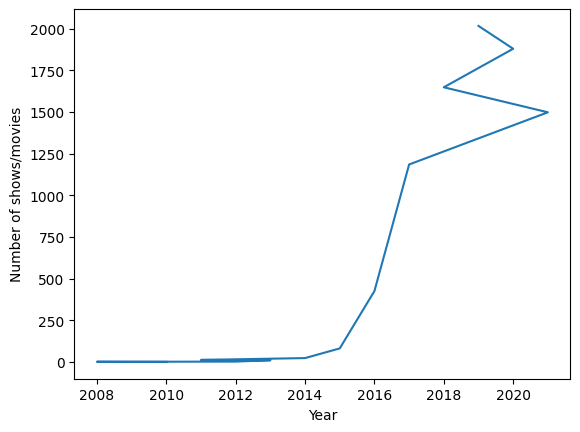

In [59]:
# How many movies/TV shows were added each year?

year_count = df['year_added'].value_counts()

plt.plot(year_count)
plt.xlabel('Year')
plt.ylabel('Number of shows/movies')
plt.show()

In [73]:
# Which month has the highest releases?

month_count = df['month_added'].value_counts().reset_index()
month_count.max()

,0
month_added,12
count,827


# Content Type Analysis

In [83]:
# Compare the ratio of Movies vs. TV Shows

type_counts = df['type'].value_counts()
type_counts

,count
type,
Movie,6126
TV Show,2664


In [85]:
movie_counts = type_counts['Movie']
show_counts = type_counts['TV Show']
ratio = movie_counts / show_counts
print(f"Ratio of Movies to TV Shows: {ratio}")

Ratio of Movies to TV Shows: 2.2995495495495497


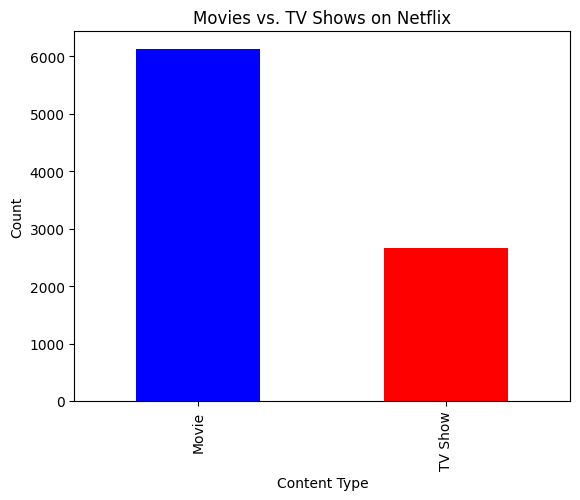

In [87]:
type_counts.plot(kind="bar", color=["blue", "red"])
plt.title("Movies vs. TV Shows on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

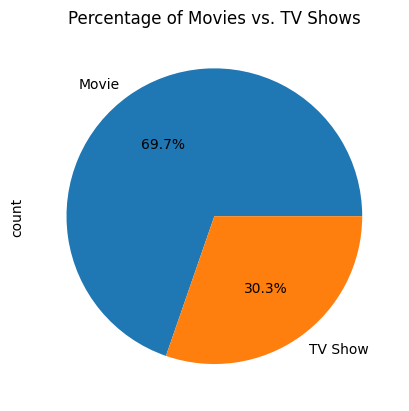

In [88]:
type_counts.plot(kind="pie", autopct="%1.1f%%")
plt.title("Percentage of Movies vs. TV Shows")
plt.show()

In [89]:
# Which countries produce more movies vs. TV shows

movie = df[df['type'] == 'Movie']
show = df[df['type'] == 'TV Show']

In [103]:
df['country'] = df['country'].str.split(', ')
df = df.explode('country')

country_type_counts = df.groupby(['country', 'type']).size().unstack(fill_value=0)

country_type_counts['movie_to_tv_ratio'] = country_type_counts['Movie'] / country_type_counts['TV Show']

most_movies = country_type_counts.sort_values('Movie', ascending=False)
most_tv_shows = country_type_counts.sort_values('TV Show', ascending=False)

print("Top 5 Countries with Most MOVIES:")
print(most_movies[['Movie']].head(5))
print("\nTop 5 Countries with Most TV SHOWS:")
print(most_tv_shows[['TV Show']].head(5))
print("\nCountries with Highest Movie-to-TV-Show Ratios:")
print(country_type_counts.sort_values('movie_to_tv_ratio', ascending=False).head(5))

Top 5 Countries with Most MOVIES:
type            Movie
country              
United States    3187
India             962
United Kingdom    532
Canada            319
France            303

Top 5 Countries with Most TV SHOWS:
type            TV Show
country                
United States      1322
United Kingdom      271
Japan               197
South Korea         170
Canada              126

Countries with Highest Movie-to-TV-Show Ratios:
type       Movie  TV Show  movie_to_tv_ratio
country                                     
Lithuania      1        0                inf
Paraguay       1        0                inf
Palestine      1        0                inf
Nicaragua      1        0                inf
Nepal          2        0                inf


# Duration Exploration

average duration id 99.58488410055502 min



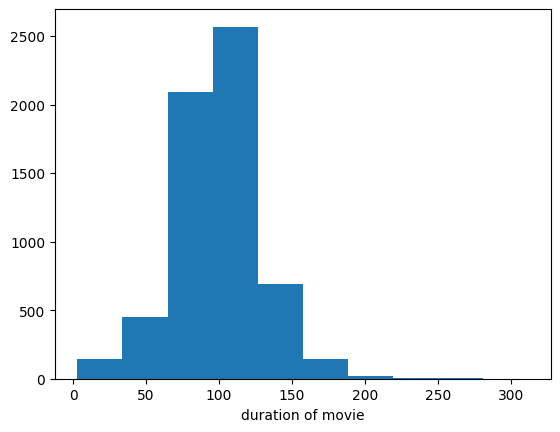

In [108]:
# For movies: What’s the average duration? Distribution of movie lengths.

ave_time = movie['num of duration'].mean()
print(f'average duration id {ave_time} min\n')

plt.hist(x = movie['num of duration'])
plt.xlabel('duration of movie')
plt.show()

In [ ]:
mode

In [118]:
# For TV shows: Most common number of seasons

show['num of duration'].mode()

,num of duration
0,1


# Rating Analysis

In [119]:
# Which ratings (e.g., PG-13, TV-MA) are most common?

df['rating'].value_counts()

,count
rating,
TV-MA,3749
TV-14,2402
R,1236
TV-PG,1000
PG-13,769
TV-Y7,430
PG,429
TV-Y,381
TV-G,244


# Director

In [121]:
# Who are the top 10 directors with the most content?
df['director'].value_counts()[1:11]

,count
director,
Rajiv Chilaka,19
Martin Scorsese,18
Steven Spielberg,18
"Raúl Campos, Jan Suter",18
Youssef Chahine,17
Suhas Kadav,16
Marcus Raboy,16
Martin Campbell,15
Don Michael Paul,15


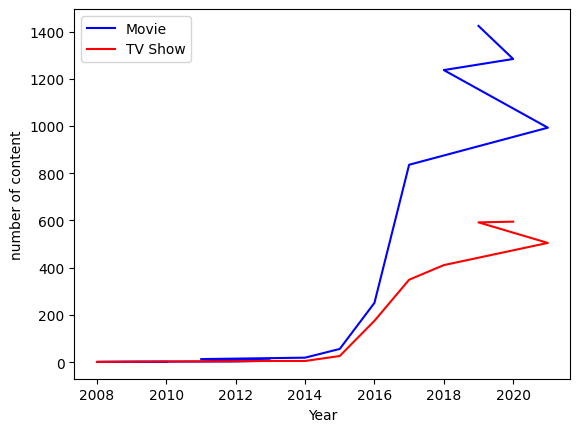

In [126]:
movie_year = movie['year_added'].value_counts()
show_year = show['year_added'].value_counts()

plt.plot(movie_year, 'b',label= 'Movie')
plt.plot(show_year, 'r',label= 'TV Show')
plt.legend()
plt.xlabel('Year')
plt.ylabel('number of content')
plt.show()